In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/kaggle/input/netflix-data/Netflix Dataset.csv")



In [7]:
print(df.head())

  Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

        Release_Date Rating   Duration  \
0    August 14, 2020  TV-MA  4 Seasons   
1  December 23, 2016  TV-MA     93 min   
2  December 20, 2018      R     78 min   
3  November 16, 2017  PG-13     80 min   
4    January 1, 2020  PG-13    123 min   

                               

In [16]:
print(df.tail())

     Show_Id Category                                    Title     Director  \
7784   s7783    Movie                                     Zozo  Josef Fares   
7785   s7784    Movie                                   Zubaan  Mozez Singh   
7786   s7785    Movie                        Zulu Man in Japan          NaN   
7787   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7788   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   Cast  \
7784  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7785  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7786                                            Nasty C   
7787                         Adriano Zumbo, Rachel Khoo   
7788                                                NaN   

                                                Country        Release_Date  \
7784  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7785        

In [8]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB
None


In [24]:
df.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
Year              10
Duration_int       0
dtype: int64

In [4]:
# Convert Release_Date to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Handle missing values
df['Director'] = df['Director'].fillna("Unknown")
df['Cast'] = df['Cast'].fillna("Unknown")
df['Country'] = df['Country'].fillna("Unknown")

# Clean genres (Type column)
df['Genre_List'] = df['Type'].str.split(", ")


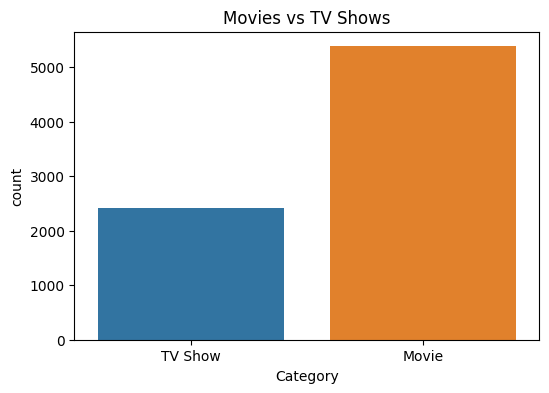

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Category')
plt.title("Movies vs TV Shows")
plt.show()


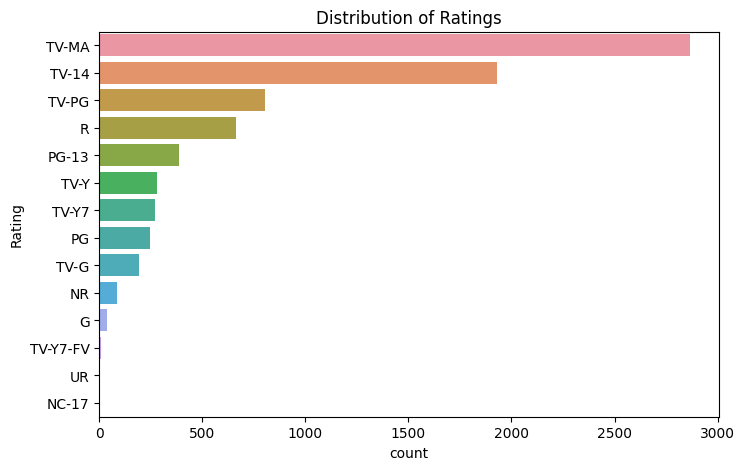

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(
    y=df['Rating'], 
    order=df['Rating'].value_counts().index
)
plt.title("Distribution of Ratings")
plt.show()


/tmp/ipykernel_48/2238844663.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['Minutes'] = movies['Duration'].str.extract('(\d+)').astype(float)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


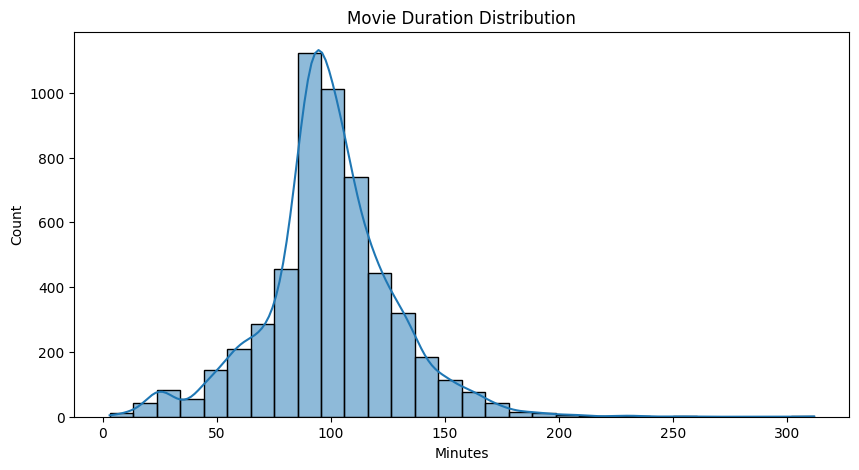

In [15]:
movies = df[df['Category'] == "Movie"]

# Extract numeric mins from "93 min"
movies['Minutes'] = movies['Duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(10,5))
sns.histplot(movies['Minutes'], bins=30, kde=True)
plt.title("Movie Duration Distribution")
plt.xlabel("Minutes")
plt.show()


In [19]:
df_directors = df['Director'].dropna().str.split(', ')
df_directors = df_directors.explode()

df_directors.value_counts().head(20)


Director
Jan Suter              21
Raúl Campos            19
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Martin Scorsese        12
Youssef Chahine        12
Jay Chapman            12
Steven Spielberg       10
David Dhawan            9
Anurag Kashyap          9
Shannon Hartman         9
Johnnie To              8
Yılmaz Erdoğan          8
Quentin Tarantino       8
Ryan Polito             8
Lance Bangs             8
Justin G. Dyck          8
Hakan Algül             8
Umesh Mehra             8
Name: count, dtype: int64

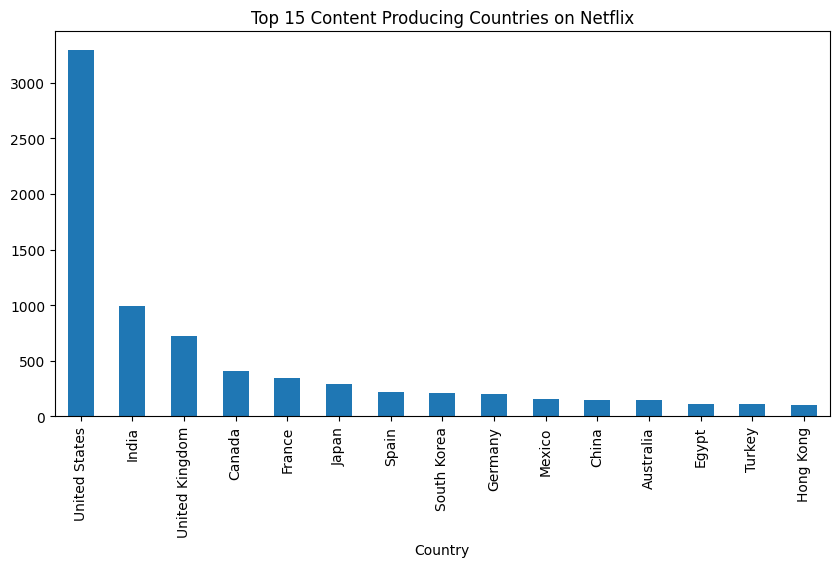

In [22]:
from collections import Counter

country_data = df['Country'].dropna().str.split(', ')
country_data = country_data.explode()

top_countries = country_data.value_counts().head(15)

plt.figure(figsize=(10,5))
top_countries.plot(kind='bar')
plt.title("Top 15 Content Producing Countries on Netflix")
plt.xticks(rotation=90)
plt.show()
